In [92]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import os
%matplotlib inline 

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
def show_image(image, title=None):
    channels = image.shape[2] if len(image.shape) == 3 else 1
    if channels == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    oldfigsize = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = (5,5)
    plt.autoscale(enable=True, axis='both', tight=False)
    plt.axis('off')
    plt.imshow(image, aspect='equal', interpolation='gaussian', cmap='gray' if channels == 1 else None)
    plt.title(title)
    plt.show()
    plt.rcParams["figure.figsize"] = oldfigsize

In [93]:
image = cv2.imread('sample6.jpg', cv2.IMREAD_GRAYSCALE)

In [114]:
class BracketMatcher:
    def __init__(self, template_path='bracket.jpg'):
        self.template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
        self.threshold = 0.8
        
    def process(self, image):
        res = cv2.matchTemplate(image,self.template,cv2.TM_CCOEFF_NORMED)
        locs = np.where( res >= self.threshold)
        return locs
    def add_boundaries(self, image, locs):
        w, h = bracket.shape[::-1]
        for pt in zip(*locs[::-1]):
            cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
        return image

In [115]:
matcher = BracketMatcher()

In [116]:
def test_sample(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    locs = matcher.process(image)
    image = matcher.add_boundaries(image, locs)
    show_image(image)    

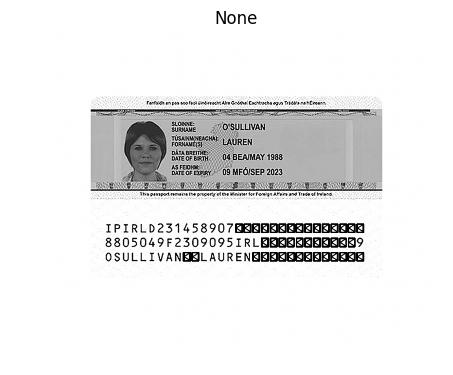

In [117]:
test_sample('sample6.jpg')

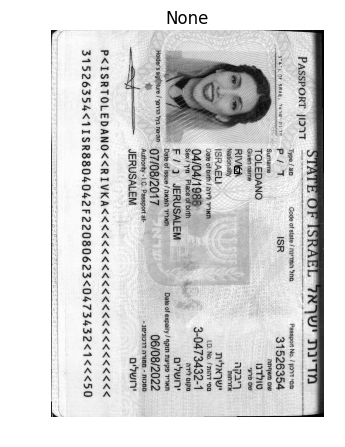

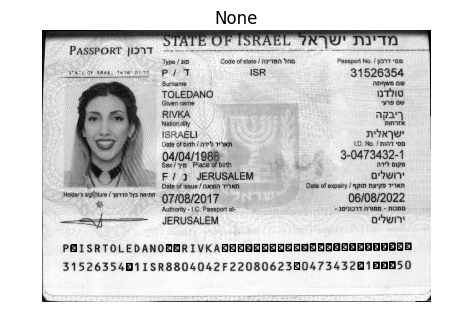

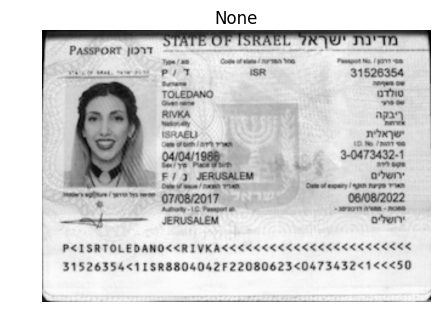

In [118]:
for path in glob.glob(os.path.join('/Users/marvin/Downloads/passport_examples','*.jpg')):
    test_sample(path)